http://pandas.pydata.org/pandas-docs/stable/10min.html#min

https://www.oreilly.com/learning/introducing-pandas-objects  basic intro

http://stackoverflow.com/questions/13226029/benefits-of-pandas-multiindex multiindex

Think of a dataframe as a specialization of a dictionary. Where a dictionary maps a key to a value, a data frame maps a column name to a Series of column data.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import sleep
from datetime import datetime

# From dict

In [6]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [7]:
population.California

38332521

# Time series

In [8]:
s = pd.Series([1,3,5,np.nan,6,8])   # create a series
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
dates = pd.date_range('20130101', periods=6)   # create index dates
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # create a dataframe
df

,A,B,C,D
2013-01-01,-1.092319,-1.415208,-1.437517,-0.501226
2013-01-02,-0.061284,1.387541,0.062434,-1.304832
2013-01-03,-0.474857,2.022017,-0.095242,-0.825265
2013-01-04,-0.510466,-0.333775,1.293678,0.687632
2013-01-05,-0.508292,-0.385552,0.461142,-1.187416
2013-01-06,2.100612,1.463034,0.998500,1.601639


In [12]:
df.iloc[0]

A   -1.092319
B   -1.415208
C   -1.437517
D   -0.501226
Name: 2013-01-01 00:00:00, dtype: float64

In [13]:
df.apply(lambda x: x.max() - x.min())

A    3.192931
B    3.437225
C    2.731195
D    2.906471
dtype: float64

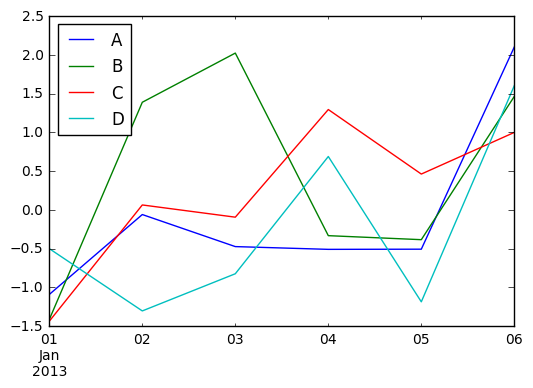

In [14]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115067860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11799f780>]], dtype=object)

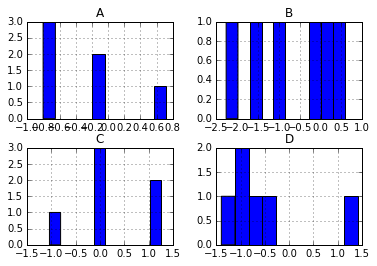

In [57]:
df.hist()

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values  # underlying numpy data

array([[-1.09231935, -1.41520805, -1.43751661, -0.50122569],
       [-0.06128408,  1.38754076,  0.06243358, -1.30483245],
       [-0.47485671,  2.02201706, -0.09524218, -0.82526528],
       [-0.51046619, -0.33377504,  1.29367805,  0.68763225],
       [-0.50829225, -0.38555168,  0.46114165, -1.18741596],
       [ 2.10061151,  1.46303448,  0.99849952,  1.60163864]])

In [18]:
df.describe()  # summary stats

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.091101,0.456343,0.213832,-0.254911
std,1.122864,1.354080,0.968332,1.156982
min,-1.092319,-1.415208,-1.437517,-1.304832
25%,-0.509923,-0.372608,-0.055823,-1.096878
50%,-0.491574,0.526883,0.261788,-0.663245
75%,-0.164677,1.444161,0.864160,0.390418
max,2.100612,2.022017,1.293678,1.601639


In [19]:
df.sort_index(axis=1, ascending=False) # sort the index

,D,C,B,A
2013-01-01,-0.501226,-1.437517,-1.415208,-1.092319
2013-01-02,-1.304832,0.062434,1.387541,-0.061284
2013-01-03,-0.825265,-0.095242,2.022017,-0.474857
2013-01-04,0.687632,1.293678,-0.333775,-0.510466
2013-01-05,-1.187416,0.461142,-0.385552,-0.508292
2013-01-06,1.601639,0.998500,1.463034,2.100612


In [20]:
df.sort_values(by='B')  # sort values

,A,B,C,D
2013-01-01,-1.092319,-1.415208,-1.437517,-0.501226
2013-01-05,-0.508292,-0.385552,0.461142,-1.187416
2013-01-04,-0.510466,-0.333775,1.293678,0.687632
2013-01-02,-0.061284,1.387541,0.062434,-1.304832
2013-01-06,2.100612,1.463034,0.998500,1.601639
2013-01-03,-0.474857,2.022017,-0.095242,-0.825265


In [21]:
df['A']  # get a single col

2013-01-01   -1.092319
2013-01-02   -0.061284
2013-01-03   -0.474857
2013-01-04   -0.510466
2013-01-05   -0.508292
2013-01-06    2.100612
Freq: D, Name: A, dtype: float64

In [22]:
df.A

2013-01-01   -1.092319
2013-01-02   -0.061284
2013-01-03   -0.474857
2013-01-04   -0.510466
2013-01-05   -0.508292
2013-01-06    2.100612
Freq: D, Name: A, dtype: float64

Indexing http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing

.loc is primarily label based

.iloc is primarily integer position based 

.ix supports mixed integer and label based access. I



In [23]:
df[:3]   # get first 3 rows

,A,B,C,D
2013-01-01,-1.092319,-1.415208,-1.437517,-0.501226
2013-01-02,-0.061284,1.387541,0.062434,-1.304832
2013-01-03,-0.474857,2.022017,-0.095242,-0.825265


In [24]:
df.loc[dates[0]]  # select by label

A   -1.092319
B   -1.415208
C   -1.437517
D   -0.501226
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]  # Selecting on a multi-axis by label, indexing    df.loc[row_indexer,column_indexer]

,A,B
2013-01-01,-1.092319,-1.415208
2013-01-02,-0.061284,1.387541
2013-01-03,-0.474857,2.022017
2013-01-04,-0.510466,-0.333775
2013-01-05,-0.508292,-0.385552
2013-01-06,2.100612,1.463034


http://pandas.pydata.org/pandas-docs/stable/indexing.html#the-lookup-method

http://stackoverflow.com/questions/34519402/lookup-table-errors

df.lookup: must pass iterables, row and col lookup lists. Returns an array. use pd.DataFrame() to return a dataframe

In [26]:
df.lookup([dates[0]], ['B'])    # index, column

array([-1.41520805])

# Merging

http://pandas.pydata.org/pandas-docs/stable/10min.html#merge

In [30]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.569619,-0.542060,-0.723441,-1.803133
1,-0.570874,-0.061683,-0.935241,-1.045470
2,-0.711476,-0.200500,-1.002272,-0.777697
3,-1.447636,0.089570,-0.359010,-1.662719
4,0.305568,-1.863350,0.470495,-0.059648
5,0.234776,0.181824,0.300735,-0.157457
6,-1.681815,-0.451571,-0.863565,-0.343392
7,0.208662,0.636412,-1.470376,-0.157605
8,-1.649651,-0.285180,0.507032,1.500270
9,-0.963105,1.425267,-0.129911,1.573461


In [27]:
pieces = [df[:3], df[3:7], df[7:]]    # list of dataframes
pieces

[                   A         B         C         D
 2013-01-01 -1.092319 -1.415208 -1.437517 -0.501226
 2013-01-02 -0.061284  1.387541  0.062434 -1.304832
 2013-01-03 -0.474857  2.022017 -0.095242 -0.825265,
                    A         B         C         D
 2013-01-04 -0.510466 -0.333775  1.293678  0.687632
 2013-01-05 -0.508292 -0.385552  0.461142 -1.187416
 2013-01-06  2.100612  1.463034  0.998500  1.601639,
 Empty DataFrame
 Columns: [A, B, C, D]
 Index: []]

In [28]:
pd.concat(pieces)

,A,B,C,D
2013-01-01,-1.092319,-1.415208,-1.437517,-0.501226
2013-01-02,-0.061284,1.387541,0.062434,-1.304832
2013-01-03,-0.474857,2.022017,-0.095242,-0.825265
2013-01-04,-0.510466,-0.333775,1.293678,0.687632
2013-01-05,-0.508292,-0.385552,0.461142,-1.187416
2013-01-06,2.100612,1.463034,0.998500,1.601639


# SQL type Joining

In [29]:
left = pd.DataFrame({'key': ['foo', 'bar', 'paz'], 'lval': [1, 2, 3]})
left

,key,lval
0,foo,1
1,bar,2
2,paz,3


In [47]:
right = pd.DataFrame({'key': [ 'paz', 'bar', 'foo'], 'rval': [4, 5, 6]})
right

,key,rval
0,paz,4
1,bar,5
2,foo,6


In [50]:
 pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,6
1,bar,2,5
2,paz,3,4


# Multiindex

In [30]:
np.arrays = [['one','one','one','two','two','two'],[1,2,3,1,2,3]]

df = pd.DataFrame(np.random.randn(6,2),index=pd.MultiIndex.from_tuples(list(zip(*np.arrays))),columns=['A','B'])

df  # This is the dataframe we have generated

A         B
one 1  1.533106 -0.621831
    2  0.575488 -0.846528
    3 -0.239709  0.676552
two 1  0.118966 -0.562824
    2  0.222794  1.575050
    3  0.717885  0.313674

## Dicts to df

Test how to generate a dataframe from a loop

In [47]:
def get_now():
    """Convenience to get the current time, in ms to 3 dp"""
    return datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] # Milliseconds to 3 dp

In [48]:
get_now()

'2017-11-03 07:51:02.669'

In [58]:
frames = []  # hold generated dataframes in a list
for i in range(10):
    data = np.random.rand()
    time = get_now()
    filename = "dummy_" + str(i)
    print(i, time, data, filename)
    temp_df = pd.Series({'Sample':i, 'Data':data, 'Time':time, 'File name':filename})
    frames.append(temp_df)
    sleep(0.1)

0 2017-11-03 07:53:34.684 0.8017563589244574 dummy_0
1 2017-11-03 07:53:34.785 0.004579370134955796 dummy_1
2 2017-11-03 07:53:34.890 0.9588329030082289 dummy_2
3 2017-11-03 07:53:34.995 0.4018445545667555 dummy_3
4 2017-11-03 07:53:35.097 0.1153584074261863 dummy_4
5 2017-11-03 07:53:35.198 0.3002860681462983 dummy_5
6 2017-11-03 07:53:35.301 0.5191935078707418 dummy_6
7 2017-11-03 07:53:35.407 0.07918060574885044 dummy_7
8 2017-11-03 07:53:35.511 0.5724009464375668 dummy_8
9 2017-11-03 07:53:35.616 0.8774763619158479 dummy_9


In [76]:
frames[0] # Show a single series

Data                        0.801756
File name                    dummy_0
Sample                             0
Time         2017-11-03 07:53:34.684
dtype: object

In [59]:
my_df = pd.DataFrame(frames).set_index('Sample')
my_df

,Data,File name,Time
Sample,,,
0,0.801756,dummy_0,2017-11-03 07:53:34.684
1,0.004579,dummy_1,2017-11-03 07:53:34.785
2,0.958833,dummy_2,2017-11-03 07:53:34.890
3,0.401845,dummy_3,2017-11-03 07:53:34.995
4,0.115358,dummy_4,2017-11-03 07:53:35.097
5,0.300286,dummy_5,2017-11-03 07:53:35.198
6,0.519194,dummy_6,2017-11-03 07:53:35.301
7,0.079181,dummy_7,2017-11-03 07:53:35.407
8,0.572401,dummy_8,2017-11-03 07:53:35.511


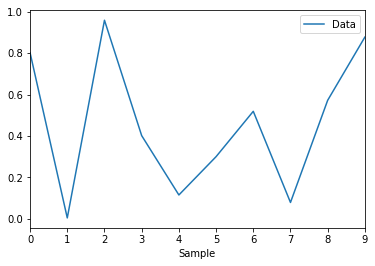

In [60]:
my_df.plot()

In [62]:
my_df['Data'].describe()

count    10.000000
mean      0.463091
std       0.342549
min       0.004579
25%       0.161590
50%       0.460519
75%       0.744418
max       0.958833
Name: Data, dtype: float64

In [63]:
my_df.to_csv('my_df.csv')

In [74]:
my_df.to_pickle('my_df.p')  # Lets also pickle the object

## Dict to csv
Bit ugly but this works.

In [72]:
my_dict = {'start':1, 'name':'test', 'val':3.134}

In [73]:
pd.DataFrame(list(my_dict.items())).to_csv('my_dict.csv')